# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras_preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [2]:
pip install Keras-Preprocessing 

Note: you may need to restart the kernel to use updated packages.


# Displaying Images

In [3]:
picture_size = 48
folder_path = "C:/Users/admin/PycharmProjects/ML project/data/train/"
subdirs = os.listdir(folder_path)

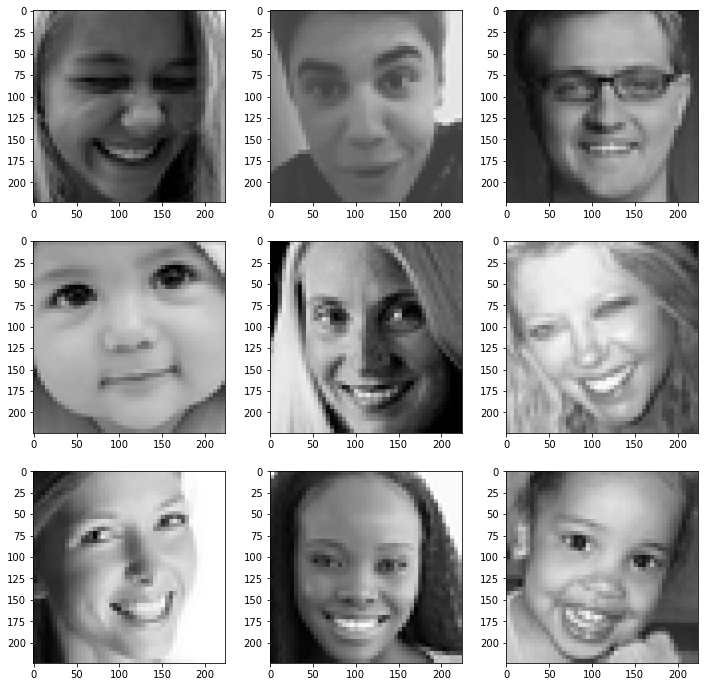

In [4]:
# Đọc file 9 ảnh trong thư mục happiness 
expression = 'happiness'

plt.figure(figsize= (12,12))
for i in range(1,10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+expression+"/"+
                  os.listdir(folder_path + expression)[i], target_size=(224, 224))
    plt.imshow(img)   
plt.show()

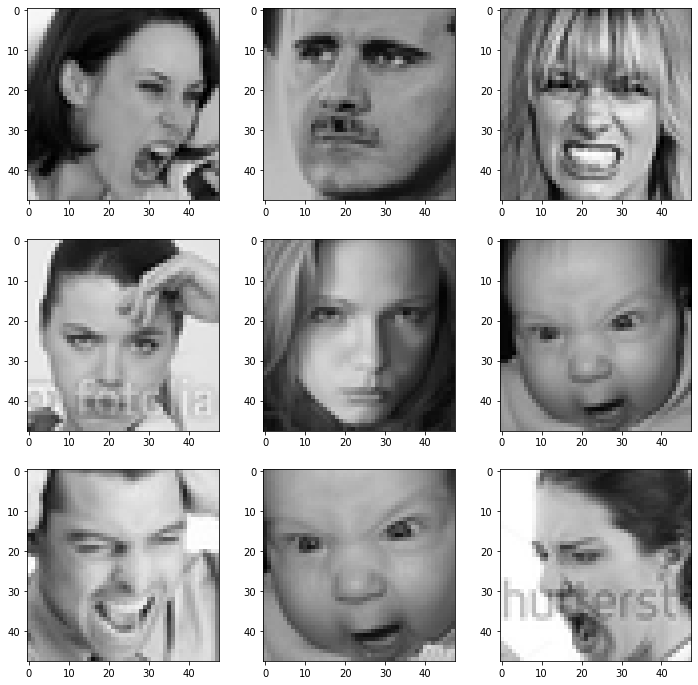

In [5]:
# Đọc file 9 ảnh trong thư mục disgust
expression = 'anger'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+expression+"/"+
                  os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Using PCA 

In [6]:
import numpy as np
import cv2
from tqdm import tqdm

X = []
y = []

for state in subdirs:
    files = [os.path.join(folder_path, state, fname)
             for fname in os.listdir(os.path.join(folder_path, state))
            ]
    
    for file in tqdm(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        X.append(image)
        y.append(state)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 3753/3753 [00:28<00:00, 133.74it/s]


In [10]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape)

(20017, 224, 224)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Example string labels
labels = y
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the labels
le.fit(labels)

# Transform the labels to integer labels
int_labels = le.transform(labels)

print(int_labels)
print(le.inverse_transform(int_labels))

[0 0 0 ... 6 6 6]
['anger' 'anger' 'anger' ... 'sadness' 'sadness' 'sadness']


In [12]:
X.shape
    

(20017, 224, 224)

In [46]:
y.shape

(20017,)

In [13]:
X_train_flatten = [image.flatten() for image in X]

In [16]:
print(type(X_train_flatten))

<class 'list'>


# Dừng

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_flatten)

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

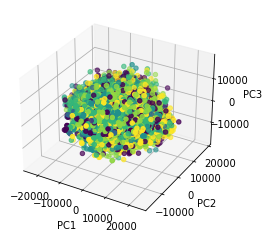

In [30]:
# Tạo biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm dữ liệu trên biểu đồ
colors = np.random.rand(len(X_train_pca))

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=int_labels)

# Đặt nhãn cho các trục
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Hiển thị biểu đồ
plt.show()

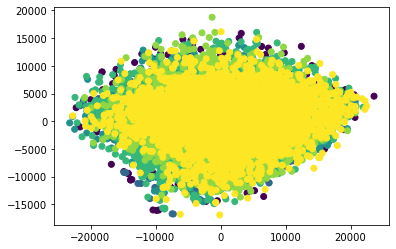

In [31]:
# Vẽ các điểm dữ liệu trên biểu đồ
colors = np.random.rand(len(X_train_pca))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=int_labels)

# Đặt nhãn cho các trục
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Hiển thị biểu đồ
plt.show()

# Using CNN 

Making Training and Validation Data

In [32]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

#Tạo file train
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

#Tạo file validation
test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 20017 images belonging to 7 classes.
Found 8611 images belonging to 7 classes.


Model Building

In [10]:
from keras.optimizers import Adam,SGD,RMSprop

#Tạo 7 class tương ứng với ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness']
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Dùng checkpoint để lưu trọng số sau mỗi lần chạy
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= 'C:/Users/admin/PycharmProjects/ML project/Dataface/',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Fitting the Model with Training and Validation Data

In [13]:

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size
                                )

C:\Users\admin\AppData\Local\Temp/ipykernel_19168/3812466526.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
156/156 [==============================] - 434s 3s/step - loss: 1.6992 - accuracy: 0.3361 - val_loss: 1.9645 - val_accuracy: 0.2473
Epoch 2/48
156/156 [==============================] - 352s 2s/step - loss: 1.3540 - accuracy: 0.4779 - val_loss: 1.4653 - val_accuracy: 0.4278
Epoch 3/48
156/156 [==============================] - 346s 2s/step - loss: 1.1782 - accuracy: 0.5423 - val_loss: 1.2102 - val_accuracy: 0.5388
Epoch 4/48
156/156 [==============================] - 380s 2s/step - loss: 1.0757 - accuracy: 0.5907 - val_loss: 1.1808 - val_accuracy: 0.5533
Epoch 5/48
156/156 [==============================] - 405s 3s/step - loss: 0.9982 - accuracy: 0.6173 - val_loss: 1.1402 - val_accuracy: 0.5587
Epoch 6/48
156/156 [==============================] - 392s 3s/step - loss: 0.9362 - accuracy: 0.6479 - val_loss: 0.9772 - val_accuracy: 0.6300
Epoch 7/48
156/156 [==============================] - 387s 2s/step - loss: 0.8854 - accuracy: 0.6702 - val_loss: 1.1445 - val_accuracy: 0.5634

In [23]:
model.save('C:/Users/admin/PycharmProjects/ML project/Dataface/emotion_model.h5')  # creates a HDF5 file 'my_model.h5'
model.save_weights('C:/Users/admin/PycharmProjects/ML project/Dataface/emotion_model.h5')

Ploting Accuracy and Loss

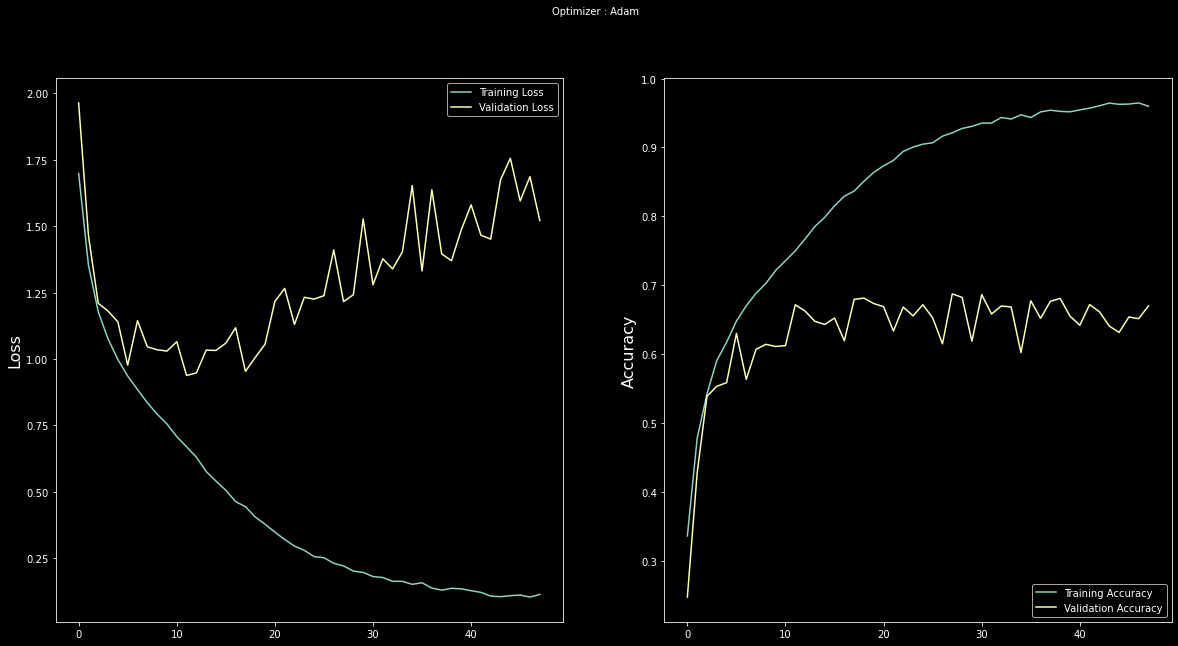

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [36]:
# Dự đoán nhãn cho tập kiểm tra
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)


68/68 [==============================] - 29s 424ms/step


In [27]:
# Lấy nhãn thực tế của tập kiểm tra
true_classes = test_set.classes
print(true_classes)
print(test_set)

[0 0 0 ... 6 6 6]


Accuracy, Confusion Matrix and Classification Report

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Tính toán accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Tính toán confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Tính toán recall và precision
class_labels = list(test_set.class_indices.keys())
classification_rep = classification_report(true_classes, predicted_classes, target_names=class_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6703054232957845
Confusion Matrix:
[[ 770    1   16   99  106  221  205]
 [   6   12    0    0    1    8   10]
 [  33    0  142   15    6   16   24]
 [  94    2    2  563   78  142  169]
 [  46    1    0   34 2313  180  153]
 [  90    0    1   61  116  933  292]
 [ 120    0    4   71  101  315 1039]]
Classification Report:
              precision    recall  f1-score   support

       anger       0.66      0.54      0.60      1418
    contempt       0.75      0.32      0.45        37
     disgust       0.86      0.60      0.71       236
        fear       0.67      0.54      0.59      1050
   happiness       0.85      0.85      0.85      2727
  neutrality       0.51      0.62      0.56      1493
     sadness       0.55      0.63      0.59      1650

    accuracy                           0.67      8611
   macro avg       0.69      0.59      0.62      8611
weighted avg       0.68      0.67      0.67      8611



# Sử dụng phương pháp Kmean

In [3]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

train_folder_path = "C:/Users/admin/PycharmProjects/ML project/data/train/"

# Danh sách các nhãn
labels = ['happiness', 'anger', 'fear', 'neutrality', 'contempt', 'sadness', 'disgust']

In [4]:
# Lấy đường dẫn đến tất cả các tệp ảnh trong thư mục train
image_paths = []
for label in labels:
    folder_path = os.path.join(train_folder_path, label)
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image_paths.append(image_path)
# Đọc và chuyển đổi ảnh thành vectơ đặc trưng
features = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang màu RGB
    image = cv2.resize(image, (48, 48))  # Giảm kích thước ảnh xuống 48x48
    features.append(image.flatten())
    
features = np.array(features)  # Chuyển đổi sang mảng numpy


In [5]:
# Giảm chiều xuống 100 sử dụng PCA
pca = PCA(n_components=100)
features = pca.fit_transform(features)


In [6]:
# Áp dụng phương pháp K-means để phân cụm
num_clusters = 7  # Số lượng cụm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=7, random_state=42)

Cluster 0: 3043 points
Cluster 1: 3478 points
Cluster 2: 2981 points
Cluster 3: 2451 points
Cluster 4: 3051 points
Cluster 5: 2531 points
Cluster 6: 2482 points


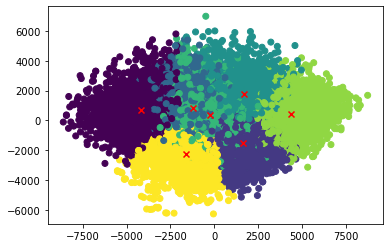

In [13]:
# Đếm số điểm trong từng cụm
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

# Tính điểm trung tâm của từng cụm
centers = kmeans.cluster_centers_

# Vẽ biểu đồ cụm và điểm trung tâm
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Cluster Centers')


# Sử dụng SVM

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


In [ ]:
train_folder_path = "C:/Users/admin/PycharmProjects/ML project/data/train/"
validation_folder_path = "C:/Users/admin/PycharmProjects/ML project/data/validation/"


In [ ]:
# Kích thước ảnh
picture_size = 48


In [ ]:
# Lấy danh sách các nhãn
labels = ['happiness', 'anger', 'fear', 'neutrality', 'contempt', 'sadness', 'disgust']


In [ ]:
# Xử lý dữ liệu huấn luyện
X_train = []
y_train = []

In [ ]:
for label in labels:
    folder_path = os.path.join(train_folder_path, label)
    files = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)]
    files_train, files_test = train_test_split(files, test_size=0.3, random_state=42)  # Chia tập train thành train và test

    for file in tqdm(files_train):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (picture_size, picture_size))
        image = image.flatten().tolist()  # Duỗi thẳng ảnh thành danh sách
        X_train.append(image)
        y_train.append(label)


In [ ]:
# Chuyển đổi X_train và y_train thành mảng numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
# Áp dụng PCA để giảm số chiều
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)

In [68]:
# Áp dụng PCA để giảm chiều
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)

In [75]:
# Huấn luyện mô hình SVM
svm = SVC()
svm.fit(X_train_pca, y_train)

SVC()

In [76]:
# Xử lý dữ liệu validation
X_validation = []
y_validation = []


In [77]:
for label in labels:
    folder_path = os.path.join(validation_folder_path, label)
    files = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)]

    for file in tqdm(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (picture_size, picture_size))
        image = image.flatten().tolist()  # Duỗi thẳng ảnh thành danh sách
        X_validation.append(image)
        y_validation.append(label)


100%|███████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 759.39it/s]


In [78]:
# Chuyển đổi X_validation và y_validation thành mảng numpy
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)

In [79]:
# Áp dụng PCA cho dữ liệu validation
X_validation_pca = pca.transform(X_validation)

In [80]:
from sklearn.svm import LinearSVC
# Dự đoán nhãn cho dữ liệu validation
y_pred = svm.predict(X_validation_pca)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# Tính toán các độ đo
accuracy = accuracy_score(y_validation, y_pred)
confusion = confusion_matrix(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average=None)
recall = recall_score(y_validation, y_pred, average=None)

# In các độ đo
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)

# In classification report
classification_report = classification_report(y_validation, y_pred)
print(classification_report)

Accuracy: 0.4680060387875973
Confusion Matrix:
[[ 385    0    0   61  502  197  273]
 [   2    0    0    2    6   21    6]
 [  28    0   49   11   85   30   33]
 [  88    0    5  228  379  151  199]
 [  93    0    0   41 2211  152  230]
 [ 123    0    0   49  512  559  250]
 [ 154    0    1   52  573  272  598]]
Precision: [0.44100802 0.         0.89090909 0.51351351 0.51804124 0.40448625
 0.37633732]
Recall: [0.27150917 0.         0.20762712 0.21714286 0.81078108 0.37441393
 0.36242424]
              precision    recall  f1-score   support

       anger       0.44      0.27      0.34      1418
    contempt       0.00      0.00      0.00        37
     disgust       0.89      0.21      0.34       236
        fear       0.51      0.22      0.31      1050
   happiness       0.52      0.81      0.63      2727
  neutrality       0.40      0.37      0.39      1493
     sadness       0.38      0.36      0.37      1650

    accuracy                           0.47      8611
   macro avg       

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classifi

# SVM

In [84]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA

train_folder_path = "C:/Users/admin/PycharmProjects/ML project/data/train/"
validation_folder_path = "C:/Users/admin/PycharmProjects/ML project/data/validation/"

# Kích thước ảnh
picture_size = 48

In [87]:
# Lấy danh sách các nhãn
labels = ['happiness', 'anger', 'fear', 'neutrality', 'contempt', 'sadness', 'disgust']

# Xử lý dữ liệu huấn luyện
X_train = []
y_train = []


In [88]:
for label in labels:
    folder_path = os.path.join(train_folder_path, label)
    files = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)]

    for file in tqdm(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (picture_size, picture_size))
        image = image.flatten().tolist()  # Duỗi thẳng ảnh thành danh sách
        X_train.append(image)
        y_train.append(label)

100%|███████████████████████████████████████████████████████████████████████████████| 559/559 [00:04<00:00, 133.43it/s]


In [90]:
# Chuyển đổi X_train và y_train thành mảng numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

In [94]:
# Áp dụng PCA để giảm số chiều
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)

In [95]:
# Khởi tạo mô hình SVM
svm = SVC()
# Huấn luyện mô hình
svm.fit(X_train_pca, y_train)


SVC()

In [96]:
# Xử lý dữ liệu validation
X_validation = []
y_validation = []

for label in labels:
    folder_path = os.path.join(validation_folder_path, label)
    files = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)]

    for file in tqdm(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (picture_size, picture_size))
        image = image.flatten().tolist()  # Duỗi thẳng ảnh thành danh sách
        X_validation.append(image)
        y_validation.append(label)

100%|██████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 1199.45it/s]


In [97]:
# Chuyển đổi X_validation và y_validation thành mảng numpy
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)


In [98]:
# Áp dụng PCA cho dữ liệu validation
X_validation_pca = pca.transform(X_validation)

In [99]:
# Dự đoán nhãn cho dữ liệu validation
y_pred = svm.predict(X_validation_pca)

In [100]:
accuracy = accuracy_score(y_validation, y_pred)
confusion = confusion_matrix(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average=None)
recall = recall_score(y_validation, y_pred, average=None)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Precision:", precision)
print("Recall:", recall)

# In classification report
classification_report = classification_report(y_validation, y_pred)
print(classification_report)

Accuracy: 0.48298687725002903
Confusion Matrix:
 [[ 430    0    0   68  490  192  238]
 [   2    0    0    2    7   20    6]
 [  38    0   53   12   78   24   31]
 [  87    0    5  270  337  156  195]
 [  85    0    2   40 2217  147  236]
 [ 124    0    0   42  522  557  248]
 [ 157    0    0   58  541  262  632]]
Precision: [0.46587216 0.         0.88333333 0.54878049 0.5288645  0.410162
 0.39848676]
Recall: [0.30324401 0.         0.22457627 0.25714286 0.8129813  0.37307435
 0.3830303 ]
              precision    recall  f1-score   support

       anger       0.47      0.30      0.37      1418
    contempt       0.00      0.00      0.00        37
     disgust       0.88      0.22      0.36       236
        fear       0.55      0.26      0.35      1050
   happiness       0.53      0.81      0.64      2727
  neutrality       0.41      0.37      0.39      1493
     sadness       0.40      0.38      0.39      1650

    accuracy                           0.48      8611
   macro avg       

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classifi